# 다중 선형 회귀

실제 데이터에서는 입력변수 x(속성, feature)가 1개가 아닌 경우가 더 많음.
<br> 다중선형회귀에서는 시각화해서 보는 것이 사실상 불가능함.

X^(i) = i번째 데이터의 속성들을 가지는 벡터 <br>
x^(i)_j = i번째 데이터의 j번째 속성

h_θ(x) = θ_0 + θ_1 * x_1+ θ_2 * x_2 + ... <br> 
-----θ_0---------------  1 <br>
-----θ_1-------------- x_1<br> 
θ =\[ θ_2 \] ------  x = \[x_2\] <br>
-----θ_3-------------- x_3 

h_θ(x) = θ^T x= θ.T * x (in python)



### 다중선형회귀 손실함수, 변수 업데이트
#### 손실함수: 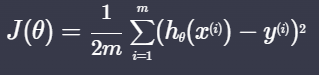
#### 변수 업데이트: 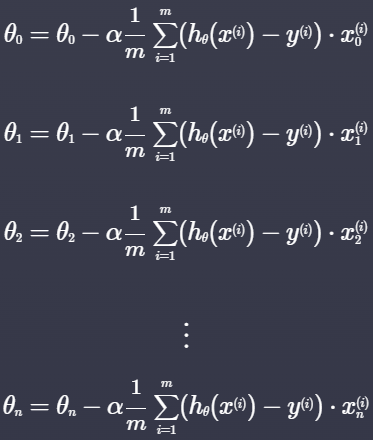
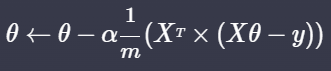

In [21]:
import numpy as np

def prediction(X, theta):
    """다중 선형 회귀 가정 함수. 모든 데이터에 대한 예측 값을 numpy 배열로 리턴한다"""
    # 1차원 벡터는 theta = theta.T 이다. 그래서 x@theta.T 해도 같음
    return X@theta
    

def gradient_descent(X, theta, y, iterations, alpha):
    """다중 선형 회귀 경사 하강법을 구현한 함수"""
    m = len(X)  # 입력 변수 개수 저장
    
    for _ in range(iterations):
        # 코드를 쓰세요
        error = prediction(X, theta) - y
        theta = theta - alpha/m*(X.T@error)
        
    return theta
    

# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 목표 변수
house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 입력 변수 y 정의
y = house_price

# 파라미터 theta 초기화
theta = np.array([0, 0, 0, 0])

# 학습률 0.01로 100번 경사 하강
theta = gradient_descent(X, theta, y, 100, 0.01)

theta

array([0.11484521, 1.21120425, 0.18270523, 0.30060782])

## 정규방정식
### 손실함수 J(theta)를 미분해서 theta 한번에 구하기

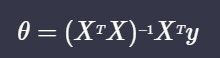

## scikit-learn 실습

In [40]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

In [26]:
boston_dataset = load_boston()

In [27]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
X = pd.DataFrame(boston_dataset.data,columns =boston_dataset.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [46]:
#목표변수 벡터
y = pd.DataFrame(boston_dataset.target, columns = ["MEDV"])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [52]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
#세타1 ~ 세타n
model.coef_

array([[-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,
         2.70536624e+00, -1.59570504e+01,  3.41397332e+00,
         1.11887670e-03, -1.49308124e+00,  3.64422378e-01,
        -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
        -5.94076089e-01]])

In [58]:
#세타0
model.intercept_

array([37.91248701])

In [61]:
y_test_prediction = model.predict(X_test)

In [64]:
mean_squared_error(y_test, y_test_prediction)**0.5

4.568292042303193

## scikit-learn 다중 선형 회귀 실습

In [66]:
# 필요한 라이브러리 import
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd  


# 당뇨병 데이터 갖고 오기
diabetes_dataset = datasets.load_diabetes()
print(diabetes_dataset.DESCR)

# 입력 변수를 사용하기 편하게 pandas dataframe으로 변환
X = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)

# 목표 변수를 사용하기 편하게 pandas dataframe으로 변환
y = pd.DataFrame(diabetes_dataset.target, columns=['diabetes'])

# 코드를 쓰세요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

model = LinearRegression()
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)

# 평균 제곱 오차의 루트를 통해서 테스트 데이터에서의 모델 성능 판단
mse = mean_squared_error(y_test, y_test_predict)

mse ** 0.5

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

54.603896119844435